In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

Cargar y limpiar datos

In [2]:
housing = pd.read_csv('Data/housing.csv')
housing = pd.get_dummies(housing, drop_first=True)
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
# Ejempolo gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42).fit(X_train, y_train)

predicciones = model.predict(X_test)

print('R2:', r2_score(y_test, predicciones))

R2: 0.8198264597968716


In [4]:
## Cross validation 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
     ('gbt', GradientBoostingRegressor(n_estimators=300))
     ])

params = {
     'gbt__max_depth': [2, 3, 4, 5],
     'gbt__learning_rate': [0.1, 0.5, 0.01]
}

grid_gbt = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, n_jobs=-1, scoring="r2").fit(X_train, y_train)

grid_gbt.best_estimator_.named_steps['gbt']

In [5]:
# Mejor estimador
grid_gbt.best_estimator_

Pipeline(steps=[('gbt',
                 GradientBoostingRegressor(max_depth=5, n_estimators=300))])

In [6]:
# r2 score
best_model = grid_gbt.best_estimator_.named_steps['gbt']
predicciones = best_model.predict(X_test)
print('R2:', r2_score(y_test, predicciones))

R2: 0.8283762444077661


In [7]:
## Calibracion


/var/folders/tr/mb4tgd2j63j6tf50s0kl_p680000gn/T/ipykernel_46453/3923727249.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=model_interpretability, palette=custom_palette)


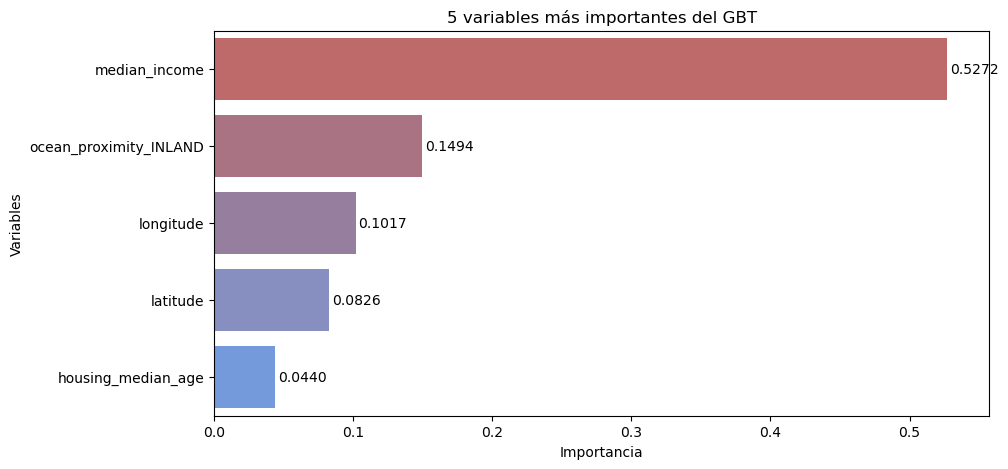

In [11]:
# Entendiendo el modelo 
def interpretability(X, model, n_var):
    model_interpretability = pd.DataFrame({
          'Variable': X.keys(),
          'Importancia': model.feature_importances_
    })
    model_interpretability = model_interpretability.sort_values(by='Importancia', ascending=False).head(n_var)

    cmap = LinearSegmentedColormap.from_list("custom_coolwarm", [colors[1], colors[0]])
    custom_palette = sns.color_palette([cmap(i) for i in np.linspace(0, 1, len(model_interpretability))])

    plt.figure(figsize=(10, 5))
    sns.barplot(x="Importancia", y="Variable", data=model_interpretability, palette=custom_palette)
    for index, value in enumerate(model_interpretability["Importancia"]):
        plt.text(value + 0.002, index, f"{value:.4f}", va="center", fontsize=10)
    plt.xlabel('Importancia')
    plt.xlim(0, max(model_interpretability["Importancia"]) + 0.03)
    plt.ylabel('Variables')
    plt.title(f'{n_var} variables más importantes del GBT')
    plt.show()

interpretability(X, best_model, 5)

    PartialDependenceDisplay.from_estimator(
        best_grid_gbt,
        X_train,
        [i],
        feature_names=X_train.columns
    )

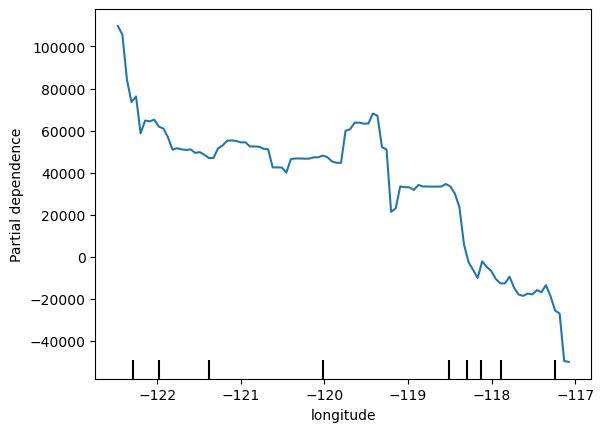

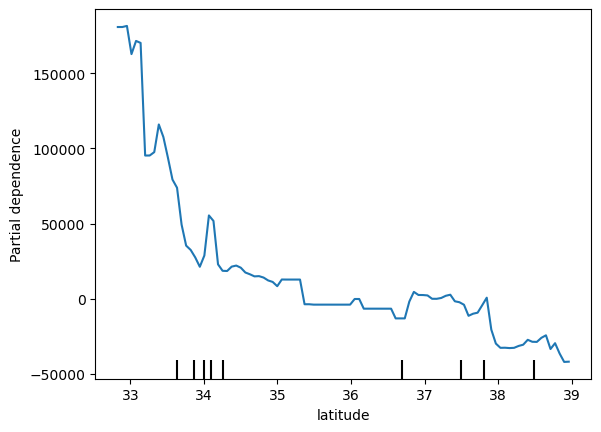

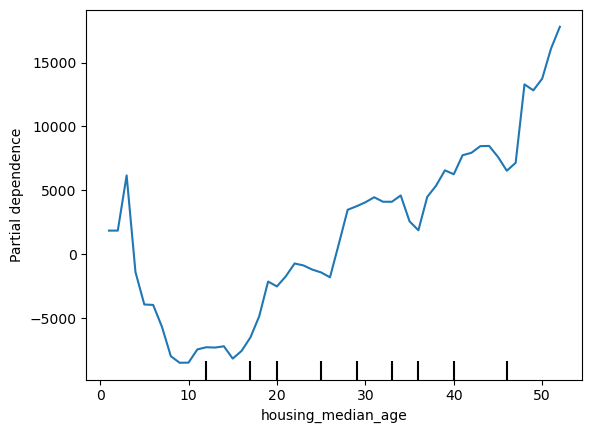

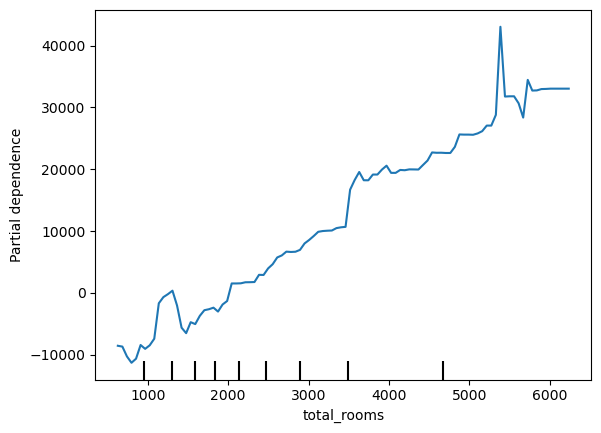

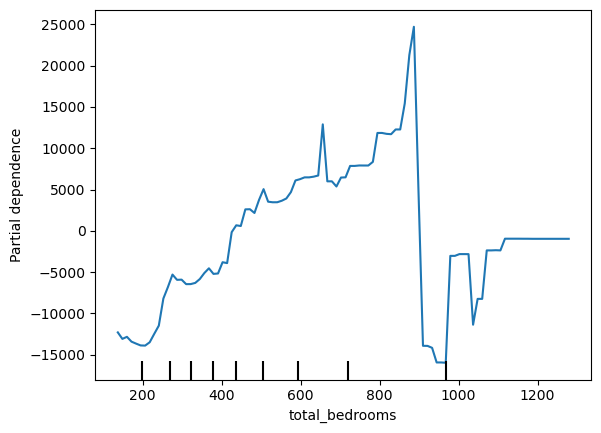

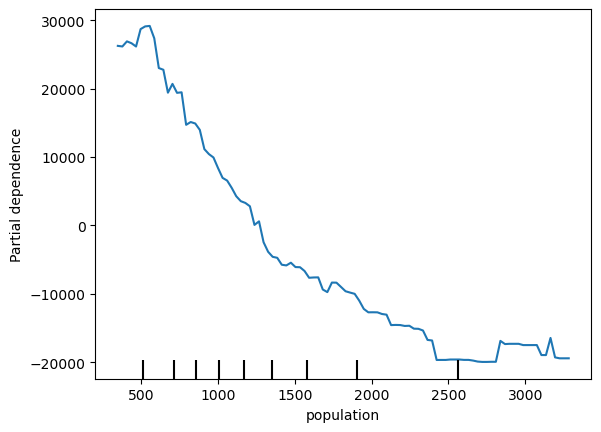

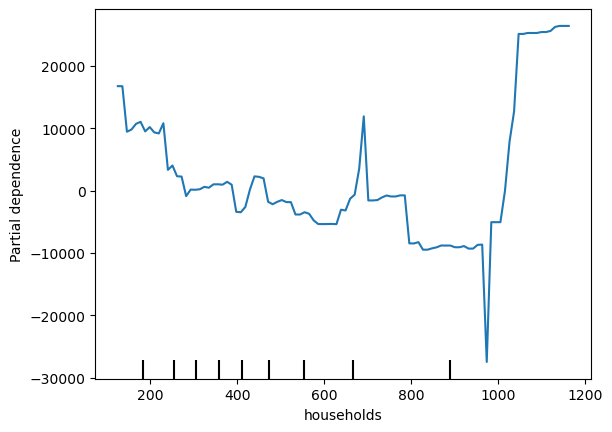

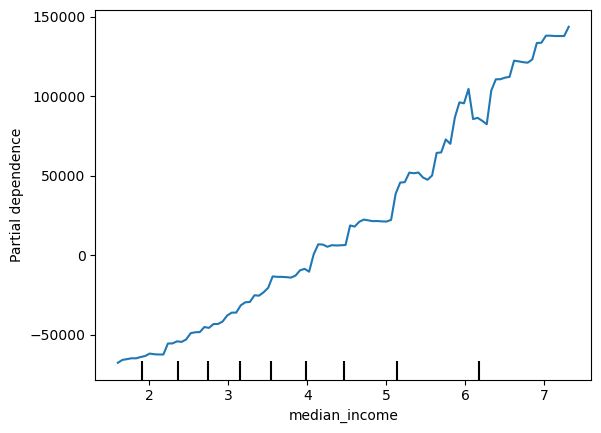

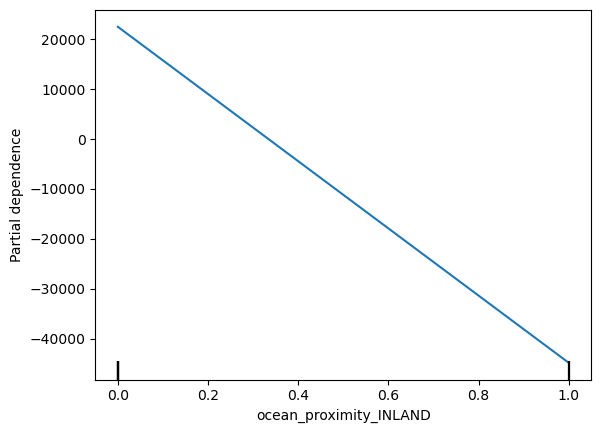

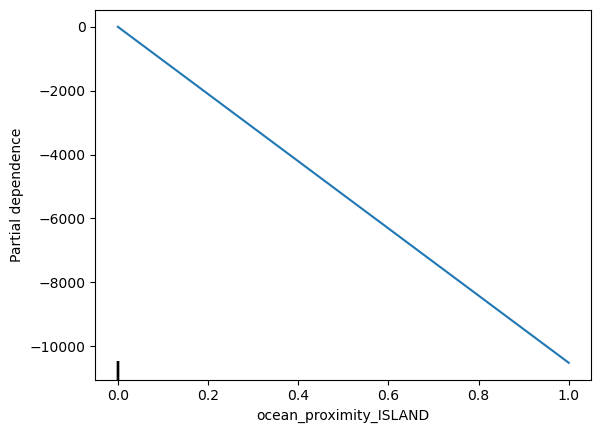

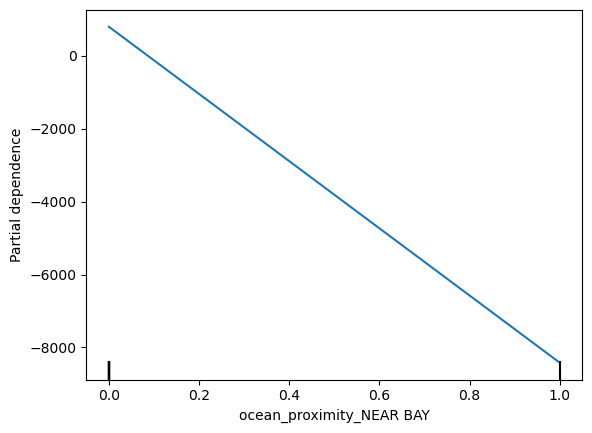

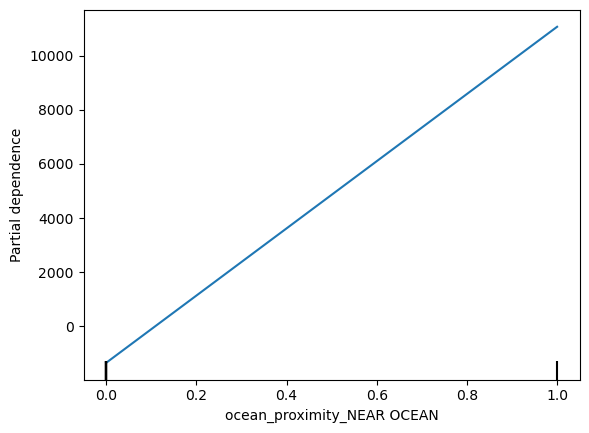

In [10]:
# Codigo for para partial dependence plot 
from sklearn.inspection import PartialDependenceDisplay

for i in range(len(X_train.keys())):
     PartialDependenceDisplay.from_estimator(
        best_model,
        X_train,
        [i],
        feature_names=X_train.columns
    )